# Breast Cancer Diagnostic (Malign/Benign) using Deep Neural Networks

Using the Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

The data has been produced using imaging of cell nuclei from breast mass samples extracted using a fine needle aspirate (FNA)

Melek Mizher

In [1]:
import sklearn.ensemble
# set cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# set cell output window height
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 160em;} </style>"))


# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time

import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

2022-11-19 22:08:27.701645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data['diagnosis'] = data['diagnosis'].apply(lambda x:1 if x == 'M' else 0)

In [6]:
labels = data['diagnosis']

In [7]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [8]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [9]:
data.drop(columns=["id", "Unnamed: 32"], inplace=True)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


<AxesSubplot: title={'center': 'Texture to Smoothness Means'}, xlabel='texture_mean', ylabel='smoothness_mean'>

Text(0.5, 0, 'Mean Texture')

Text(0, 0.5, 'Mean Smoothness')

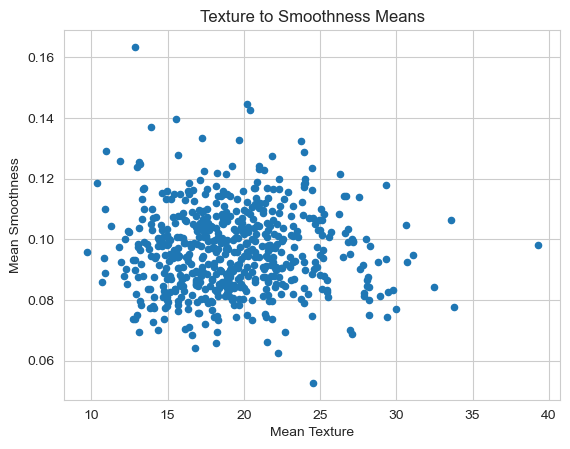

In [11]:
data.plot.scatter('texture_mean', 'smoothness_mean', title='Texture to Smoothness Means')
plt.xlabel("Mean Texture")
plt.ylabel("Mean Smoothness")
plt.show()

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot: >

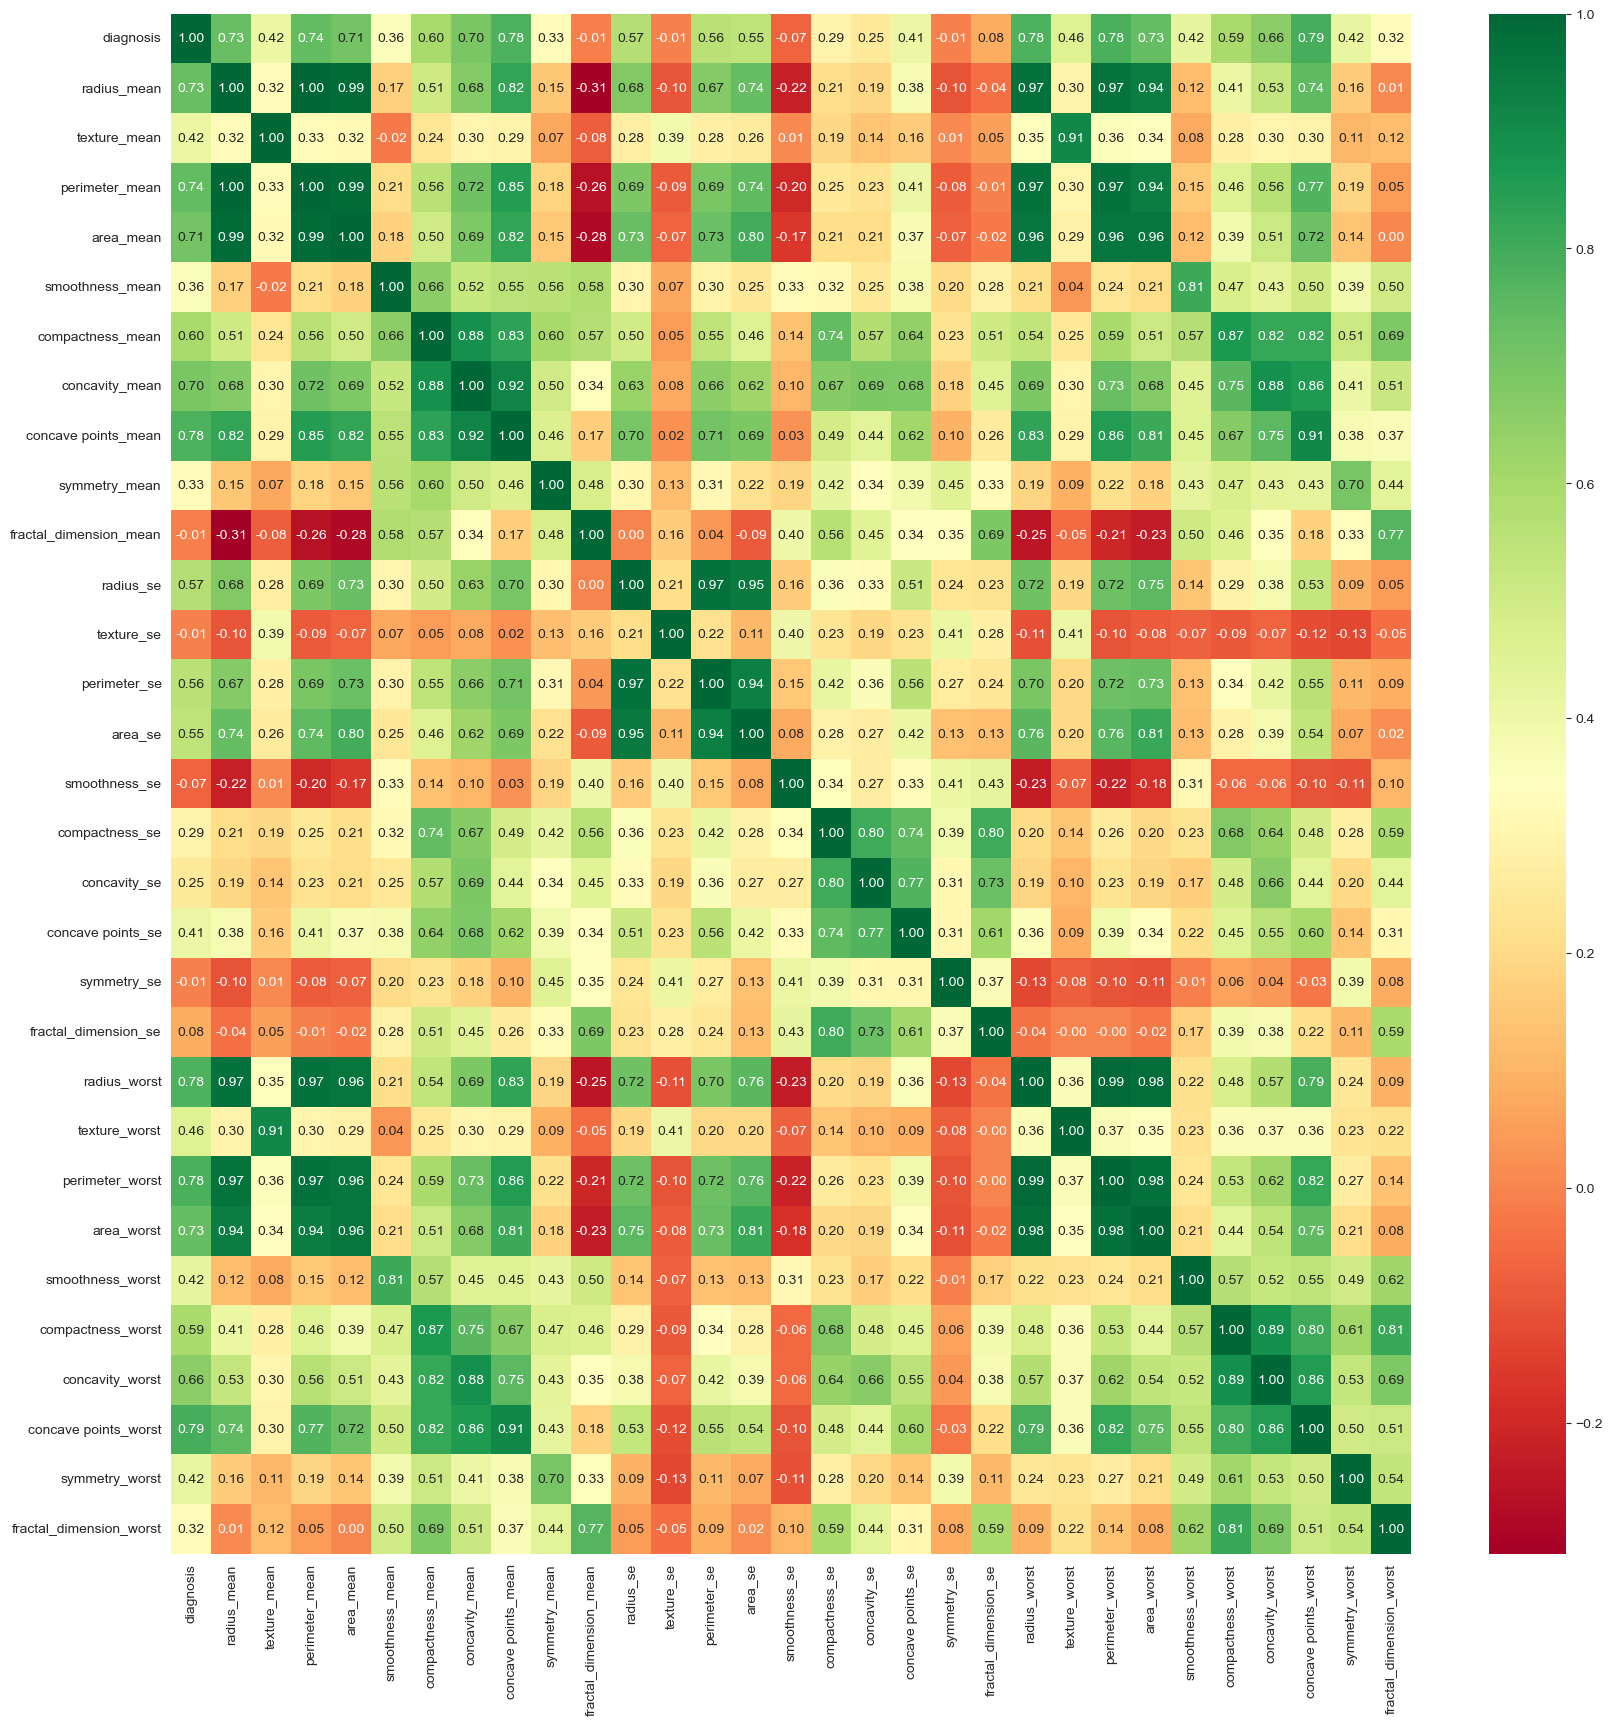

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),
               cmap='RdYlGn',
               annot=True,
               fmt=".2f")

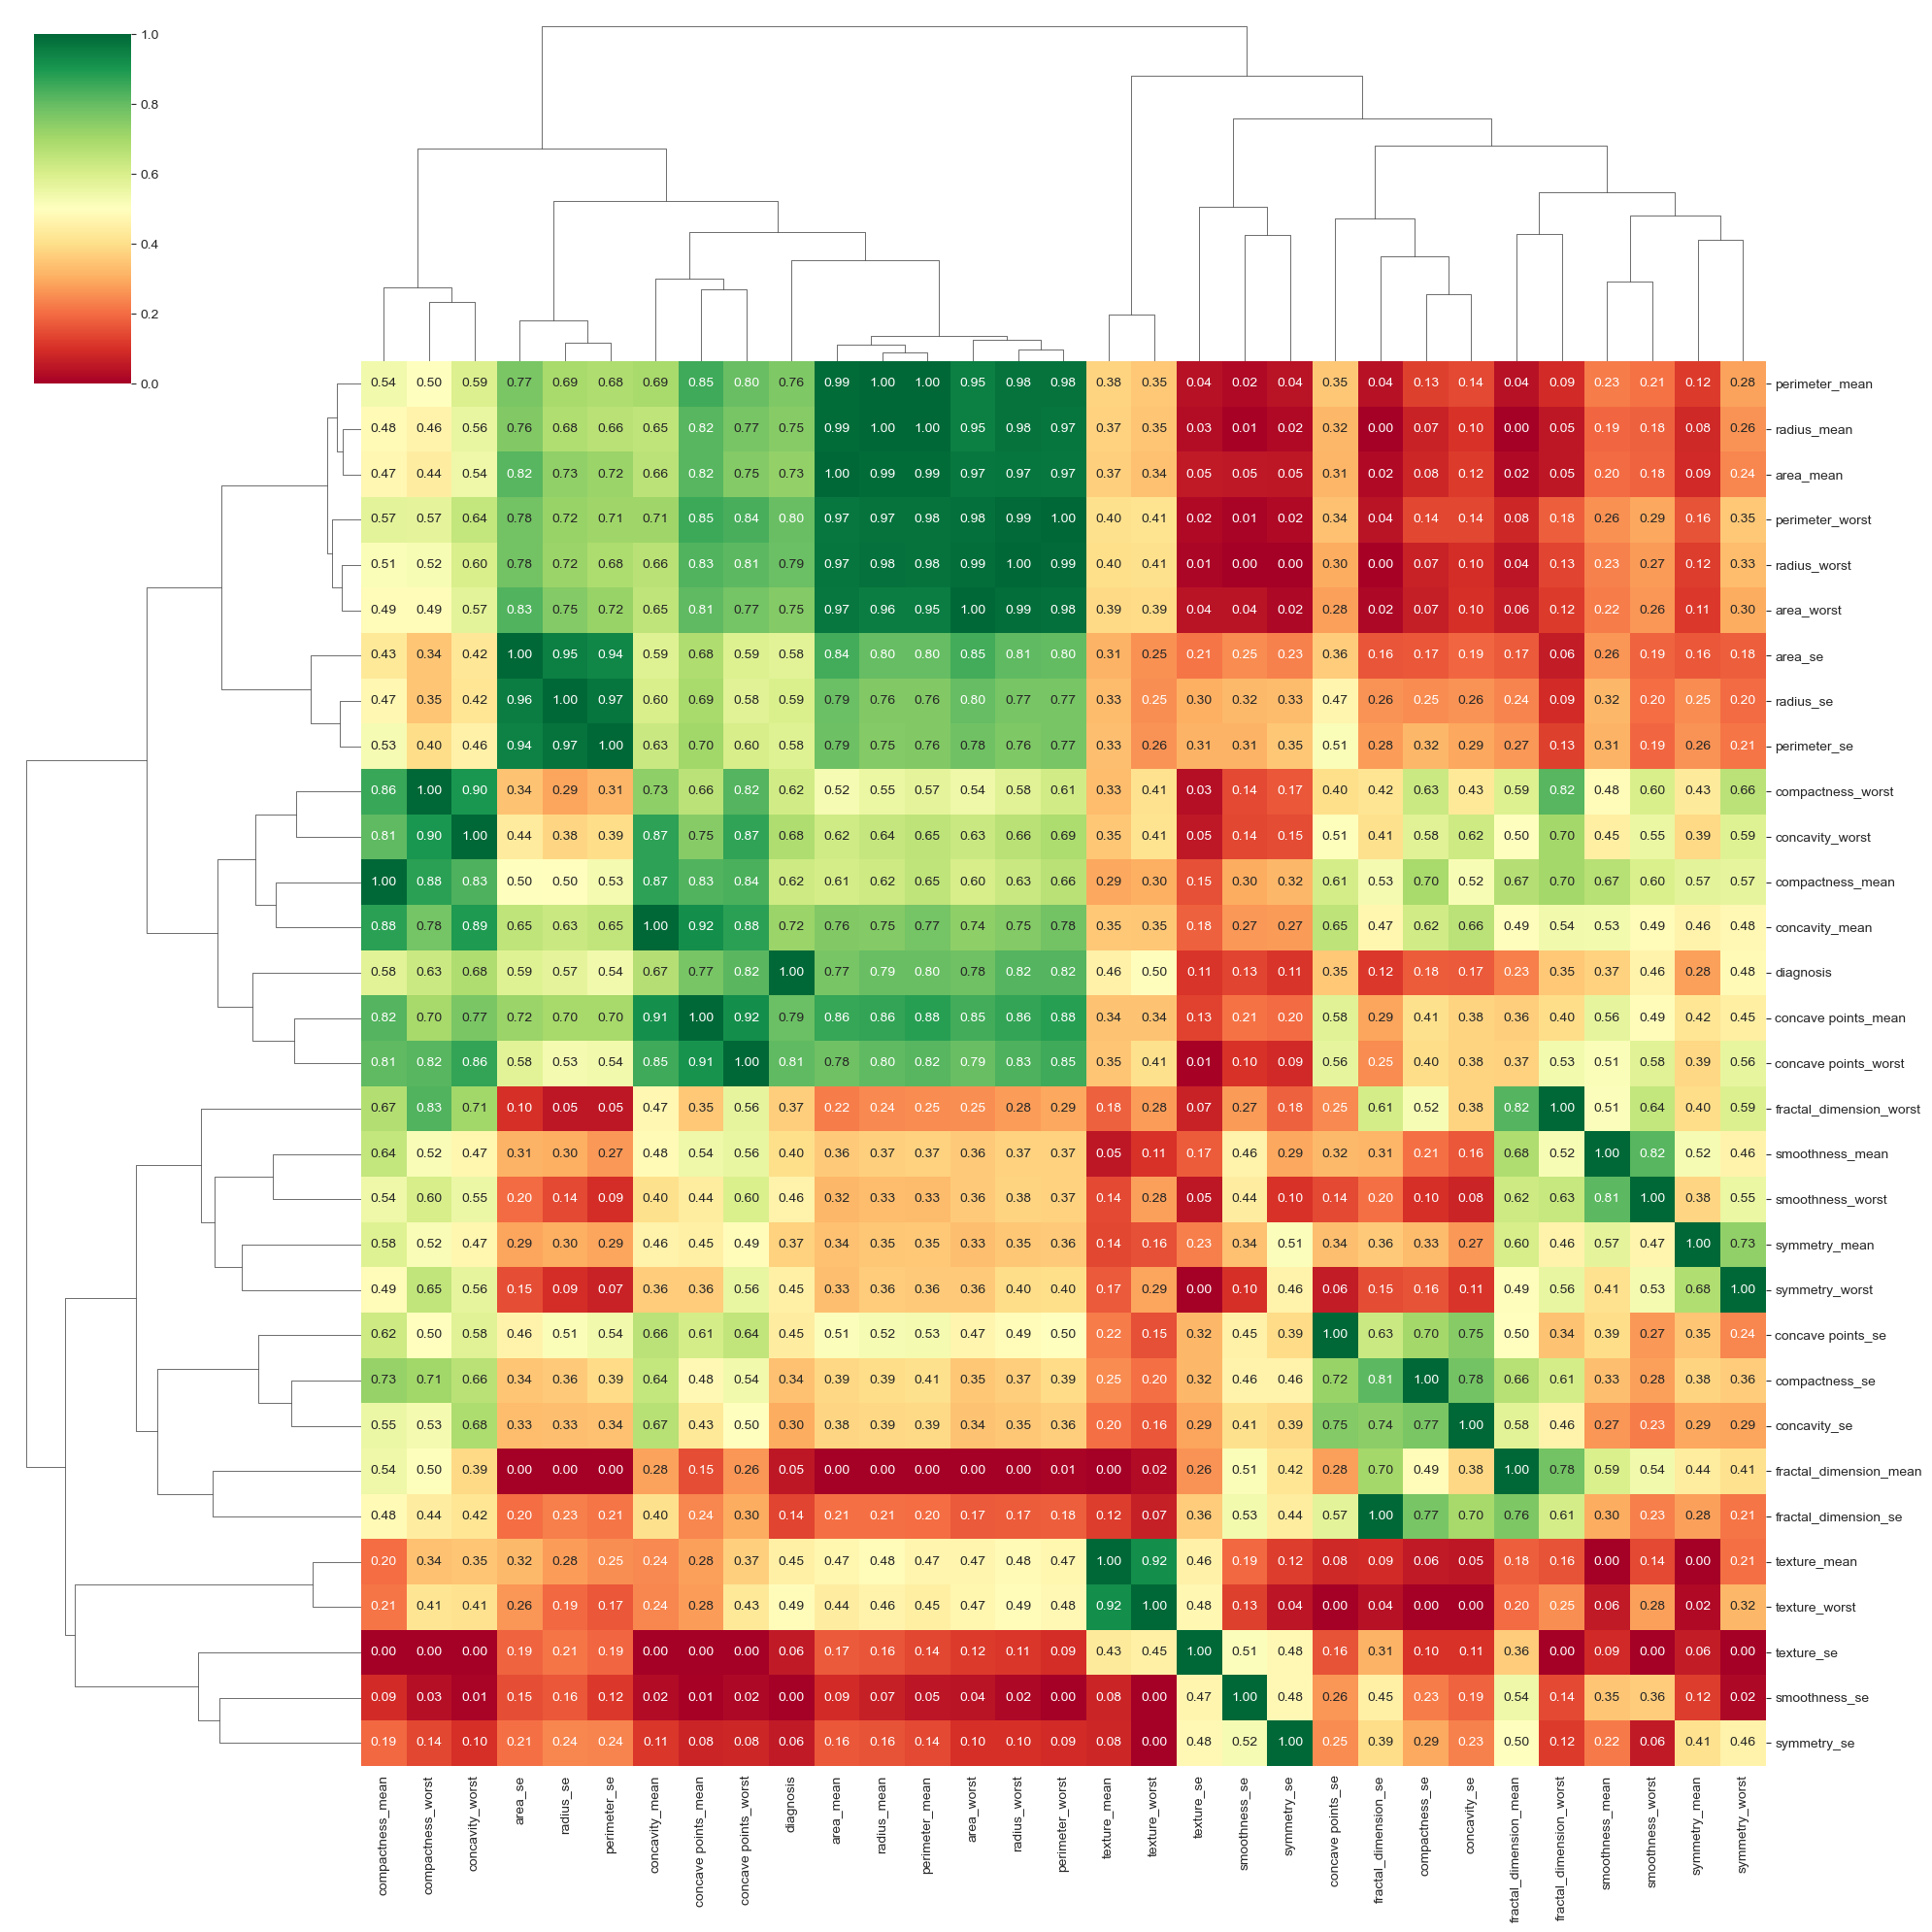

In [13]:
sns.clustermap(data.corr(),
            cmap='RdYlGn',
            annot=True,
            fmt=".2f",
            standard_scale=1,
            figsize=(20,20))

<AxesSubplot: xlabel='diagnosis', ylabel='texture_mean'>

Text(0.5, 1.0, 'Texture Mean to Diagnosis')

Text(0.5, 0, 'Diagnosis')

Text(0, 0.5, 'Mean Texture')

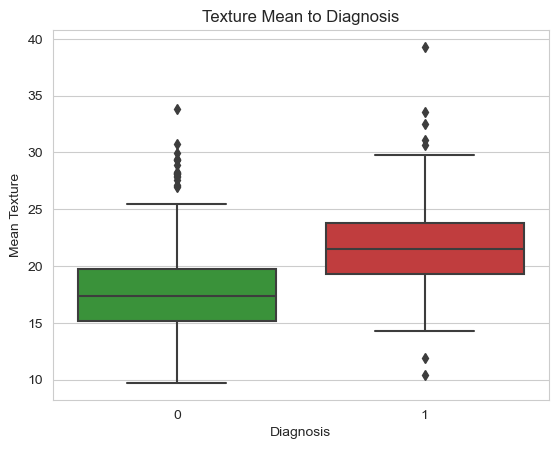

In [14]:
palette = {0:"C2",
           1:"C3"}

sns.boxplot(data=data, x="diagnosis", y="texture_mean", palette=palette)
plt.title("Texture Mean to Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Texture")
plt.show()



<AxesSubplot: xlabel='diagnosis', ylabel='area_mean'>

Text(0.5, 1.0, 'Mean Area to Diagnosis')

Text(0.5, 0, 'Diagnosis')

Text(0, 0.5, 'Mean Area')

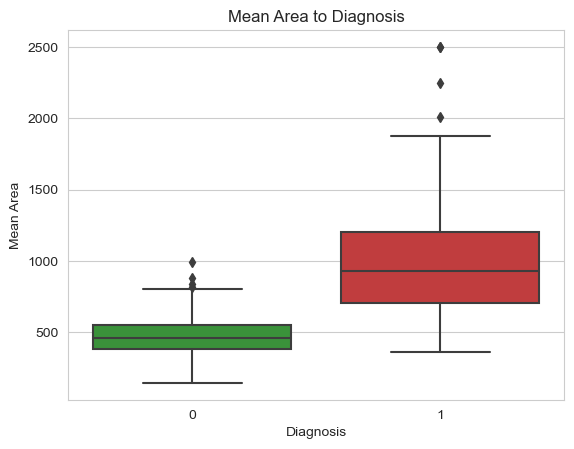

In [15]:
sns.boxplot(data=data, x="diagnosis", y="area_mean", palette=palette)
plt.title("Mean Area to Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Area")
plt.show()

<AxesSubplot: xlabel='diagnosis', ylabel='concave points_worst'>

Text(0.5, 1.0, 'Concave Points Worst to Diagnosis')

Text(0.5, 0, 'Diagnosis')

Text(0, 0.5, 'Worst Concave Points')

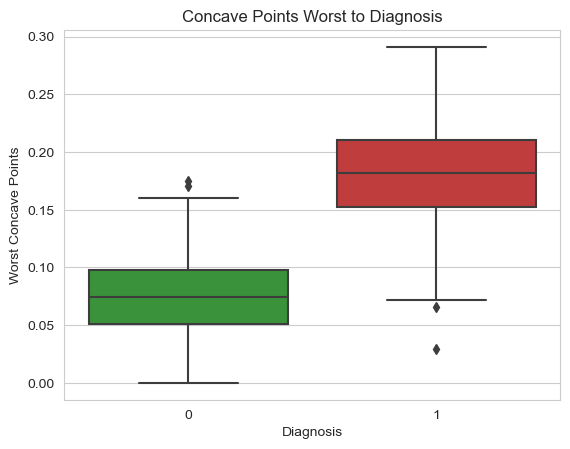

In [16]:
sns.boxplot(data=data, x="diagnosis", y="concave points_worst", palette=palette)
plt.title("Concave Points Worst to Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Worst Concave Points")
plt.show()

<AxesSubplot: xlabel='diagnosis', ylabel='concavity_se'>

Text(0.5, 1.0, 'Concavity Standard Error to Diagnosis')

Text(0.5, 0, 'Diagnosis')

Text(0, 0.5, 'Concavity Standard Error')

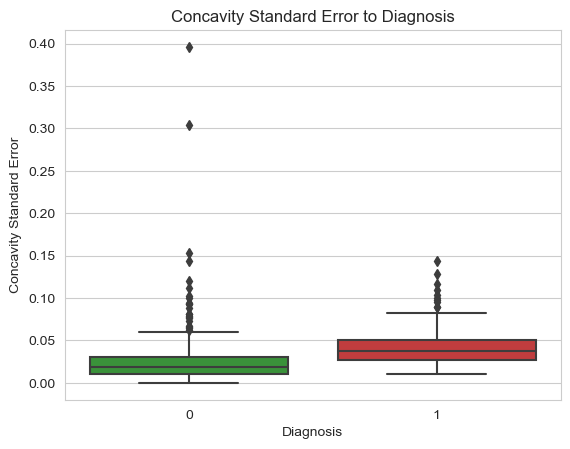

In [17]:
sns.boxplot(data=data, x="diagnosis", y="concavity_se", palette=palette)
plt.title("Concavity Standard Error to Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Concavity Standard Error")

plt.show()

# Based on Exploration; Variables that were not significantly linked to Diagnosis by at least 0.25 were removed

fractal_dimension_mean
texture_se
smoothness_se
symmetry_se
fractal_dimension_se

# Data Reorganization and Feature Creation

In [18]:
###Old drop
#data.drop(data[['fractal_dimension_mean',
   #             'texture_se',
    #            'smoothness_se',
     #           'symmetry_se',
      #          'fractal_dimension_se']], axis=1, inplace=True)

In [19]:
data_original = data.copy()

In [20]:
data.drop(data[[  'fractal_dimension_mean',
                  'texture_se',
                  'smoothness_se',
                  'symmetry_se',
                  'fractal_dimension_se']], axis=1, inplace=True)

In [21]:
data_A1 = data.copy()

In [22]:
data_simple = data_original.iloc[:,:10]

In [23]:
data_simple

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


In [24]:
data.drop(['diagnosis'], axis=1, inplace=True)

# Prevent Zero in Data

In [25]:
data.replace(0,0.000001,inplace=True)

# Create Main data of only Means, excluding Worst and SE numbers

In [26]:
main_data = data.iloc[:, :9].copy()

# Create all Squared columns

In [27]:
main_data_squared = main_data.transform(np.square)
main_data_squared = main_data_squared.add_suffix("_sq")

# Create all Log Transformed columns

In [28]:
main_data_logtransformed = main_data

main_data_logtransformed = main_data.transform(np.log)

main_data_logtransformed = main_data_logtransformed.add_suffix("_log")

# Create Final Dataframe and MinMax Scaling of Data [0,1]

In [29]:
main_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809
...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397


In [30]:
main_data_logtransformed

,radius_mean_log,texture_mean_log,perimeter_mean_log,area_mean_log,smoothness_mean_log,compactness_mean_log,concavity_mean_log,concave points_mean_log,symmetry_mean_log
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,-1.203640,-1.916643,-1.419231
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,-2.442997,-2.656834,-1.708154
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,-1.622523,-2.056507,-1.575520
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,-1.421300,-2.251892,-1.348228
4,3.010128,2.663053,4.906015,7.167809,-2.299590,-2.018911,-1.619488,-2.260484,-1.709811
...,...,...,...,...,...,...,...,...,...
564,3.070840,3.108614,4.955827,7.299121,-2.198225,-2.155028,-1.410997,-1.974001,-1.756779
565,3.002211,3.341093,4.876723,7.139660,-2.324831,-2.269150,-1.937942,-2.323707,-1.741827
566,2.809403,3.335058,4.684905,6.754721,-2.470412,-2.279846,-2.380439,-2.937086,-1.838851
567,3.025291,3.378611,4.942356,7.142827,-2.138767,-1.283738,-1.045830,-1.883875,-1.428367


In [31]:
data_scaled = pd.concat([data, main_data_squared, main_data_logtransformed], axis=1)

# Apply MinMax Normalization Technique
for column in data_scaled.columns:
    data_scaled[column] = (data_scaled[column] - data_scaled[column].min()) / (data_scaled[column].max() - data_scaled[column].min())

In [32]:
final_data = data_scaled.copy()

In [33]:
final_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,symmetry_mean_sq,radius_mean_log,texture_mean_log,perimeter_mean_log,area_mean_log,smoothness_mean_log,compactness_mean_log,concavity_mean_log,concave points_mean_log,symmetry_mean_log
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703139,0.731112,0.686364,0.356147,...,0.582405,0.679590,0.047744,0.706417,0.679617,0.715660,0.924136,0.972833,0.974354,0.783119
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203606,0.348754,0.379798,0.156437,...,0.266044,0.775803,0.432436,0.760565,0.777992,0.420421,0.486255,0.877233,0.913743,0.508892
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462510,0.635684,0.509596,0.229622,...,0.388909,0.744414,0.560406,0.745451,0.743931,0.647490,0.732628,0.940522,0.962901,0.634780
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565603,0.522860,0.776263,0.139091,...,0.692388,0.353336,0.530495,0.391798,0.346299,0.879197,0.931927,0.956043,0.946902,0.850510
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463916,0.518387,0.378283,0.233822,...,0.264706,0.765963,0.278984,0.771813,0.770255,0.569221,0.668158,0.940756,0.946198,0.507319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571461,0.690356,0.336364,0.385479,...,0.228563,0.809549,0.597798,0.805938,0.816199,0.658694,0.620903,0.956838,0.969657,0.462740
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337393,0.486628,0.349495,0.236828,...,0.239702,0.760280,0.764144,0.751746,0.760406,0.546942,0.581283,0.916191,0.941021,0.476931
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216751,0.263515,0.267677,0.124896,...,0.173011,0.621861,0.759826,0.620336,0.625723,0.418440,0.577570,0.882059,0.890794,0.384842
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755466,0.675253,0.222524,...,0.569353,0.776849,0.790989,0.796710,0.761514,0.711176,0.923385,0.985005,0.977038,0.774447


# Analyze Final Data Correlations

In [34]:
#Create Analysis Dataset (Add Diagnosis again)
analysis_df = pd.concat([labels, final_data], axis=1)

<Figure size 3000x3000 with 0 Axes>

<AxesSubplot: >

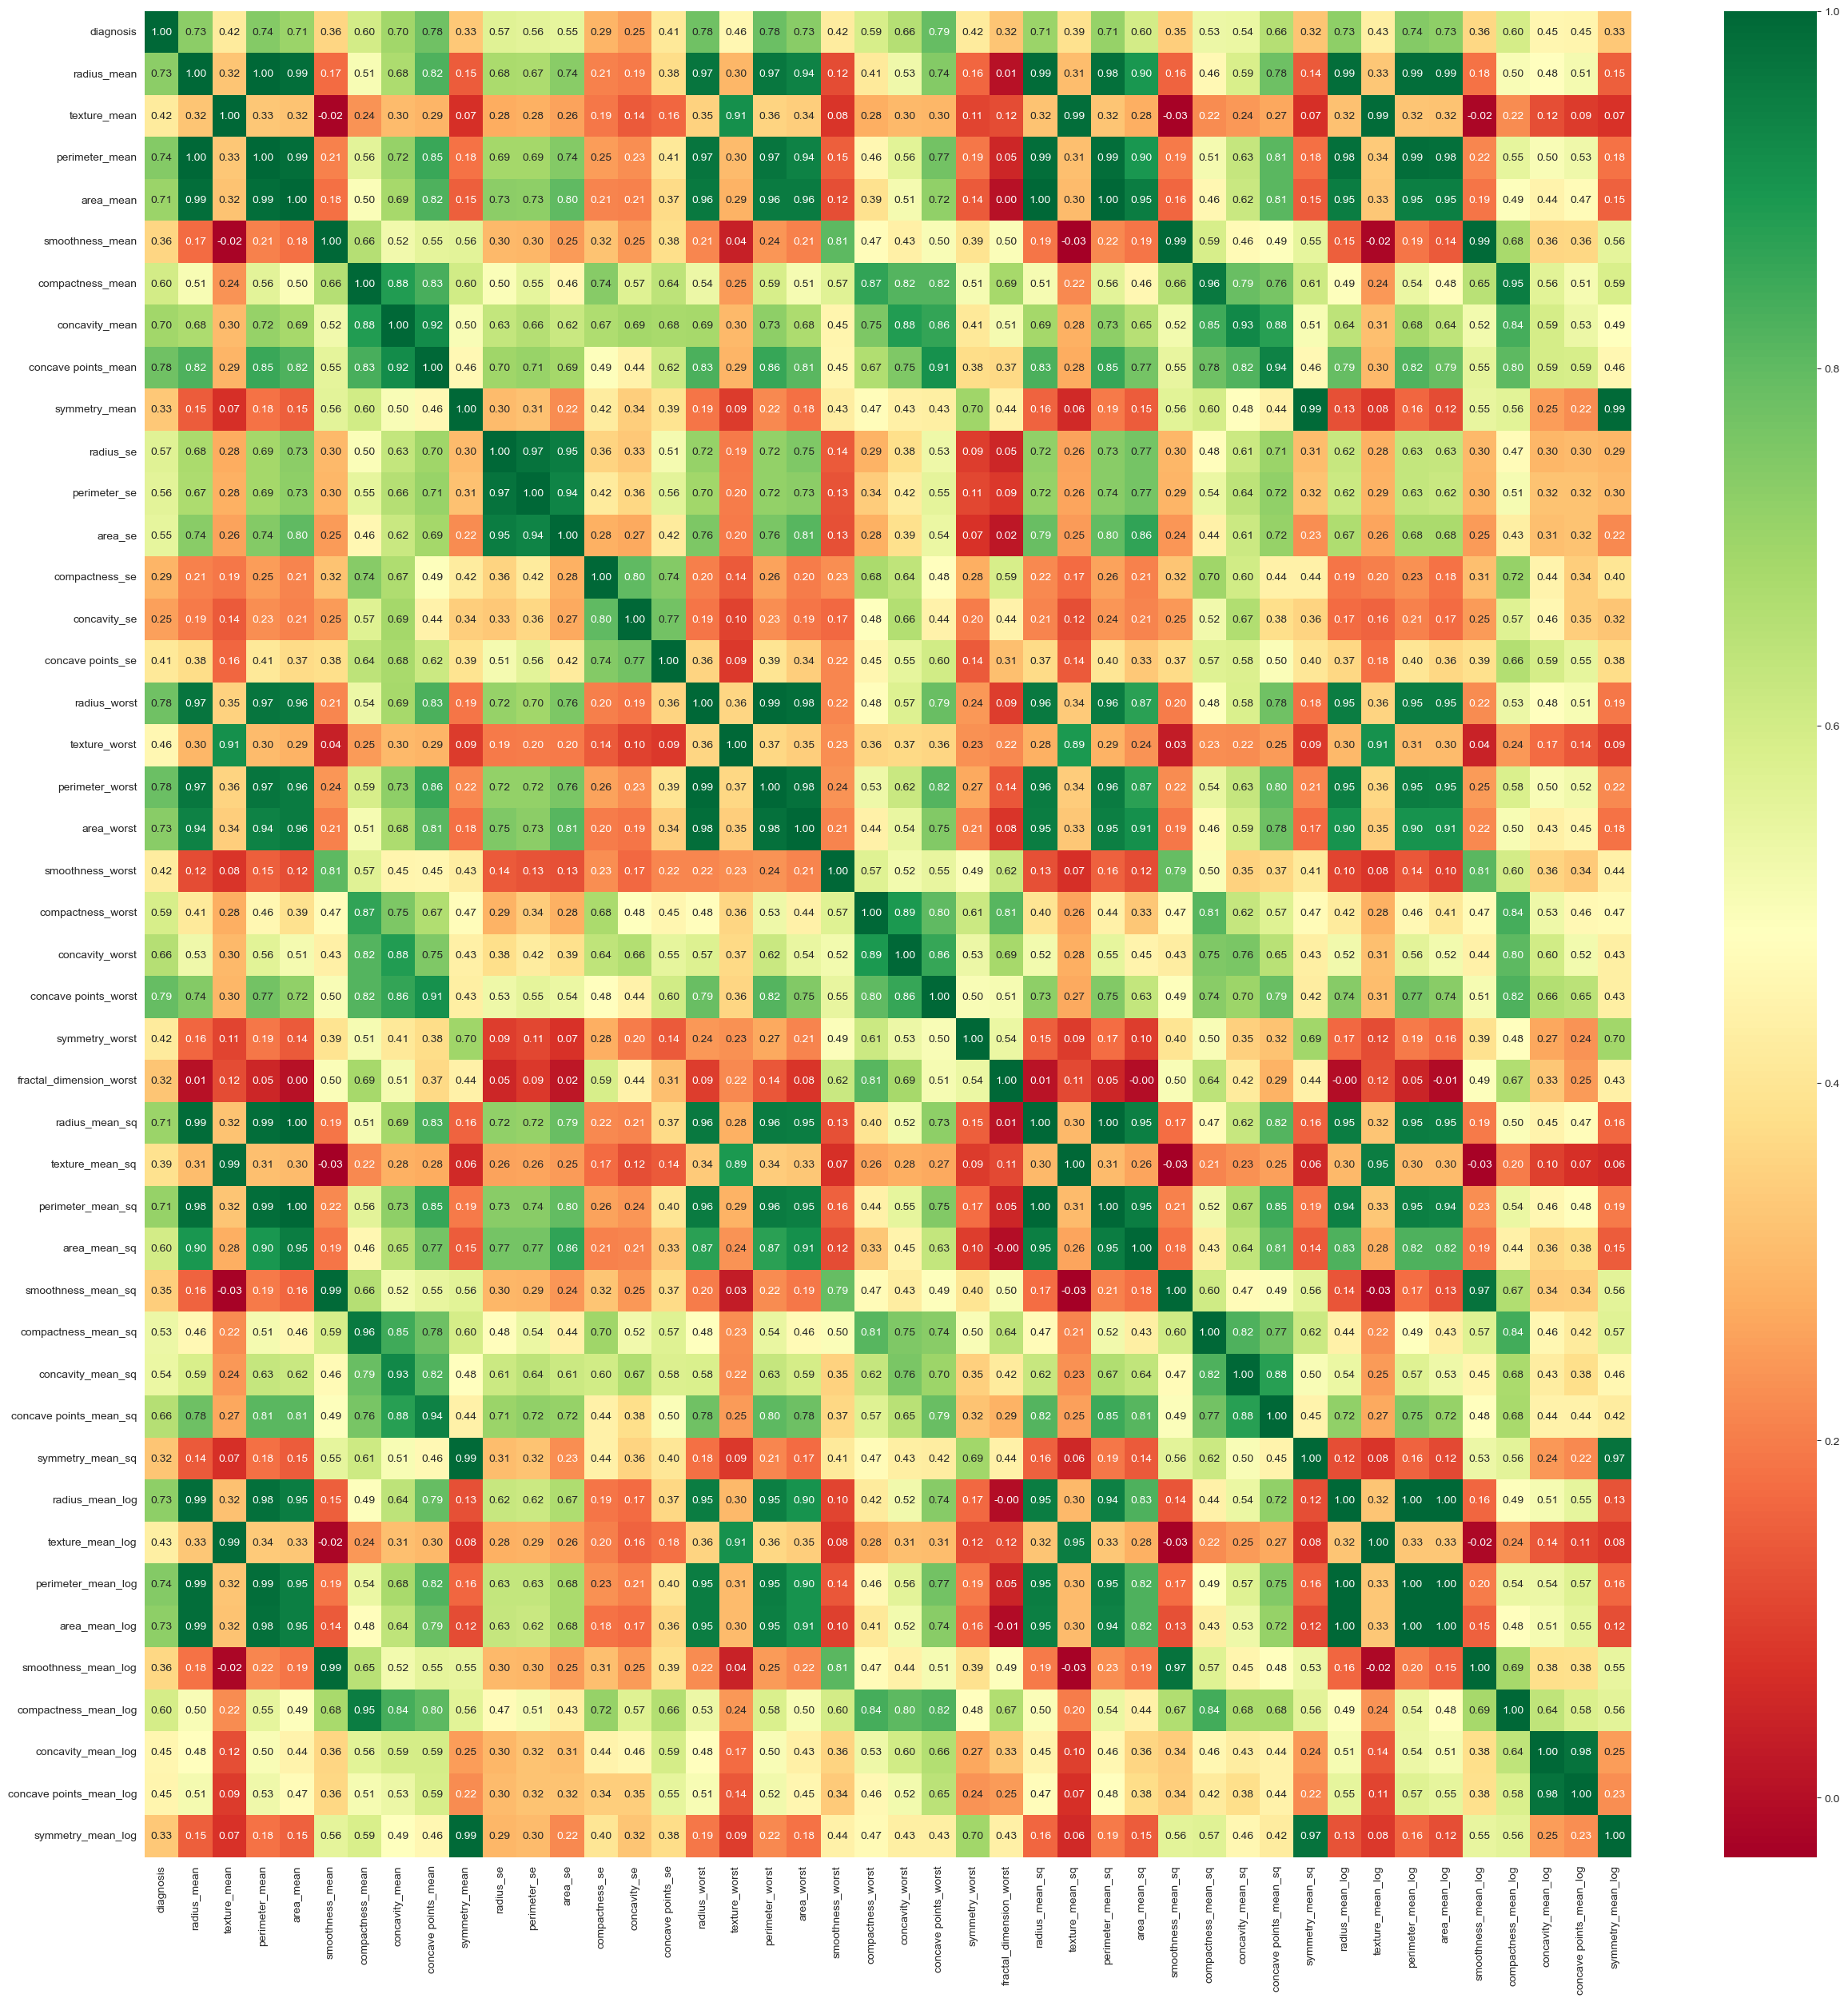

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(analysis_df.corr(),
            cmap='RdYlGn',
            annot=True,
            fmt=".2f")

# Remove all columns with correlations below 40%

smoothness_mean, symmetry_mean, compactness_se, concavity_se, fractal_dimension_worst, texture_mean_sq, smoothness_mean_sq, symmetry_mean_sq, smoothness_mean_log, symmetry_mean_log

In [36]:
final_data_backup = final_data.copy()

In [37]:
column_list = ['smoothness_mean', 'symmetry_mean', 'compactness_se', 'concavity_se', 'fractal_dimension_worst', 'texture_mean_sq', 'smoothness_mean_sq', 'symmetry_mean_sq', 'smoothness_mean_log', 'symmetry_mean_log']

#removes between 40-60%
column_list_2 = ['texture_mean',
'concave points_se',
'texture_worst',
'smoothness_worst',
'symmetry_worst',
'compactness_mean_sq',
'concavity_mean_sq',
'texture_mean_log',
'concavity_mean_log',
'concave points_mean_log']

final_data = final_data.loc[:, ~final_data.columns.isin(column_list)]

In [38]:
#final_data = final_data.loc[:, ~final_data.columns.isin(column_list_2)]

In [39]:
final_data

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,compactness_mean_sq,concavity_mean_sq,concave points_mean_sq,radius_mean_log,texture_mean_log,perimeter_mean_log,area_mean_log,compactness_mean_log,concavity_mean_log,concave points_mean_log
0,0.521037,0.022658,0.545989,0.363733,0.792037,0.703139,0.731112,0.356147,0.369034,0.273811,...,0.644825,0.494405,0.534527,0.679590,0.047744,0.706417,0.679617,0.924136,0.972833,0.974354
1,0.643144,0.272574,0.615783,0.501591,0.181768,0.203606,0.348754,0.156437,0.124440,0.125660,...,0.048843,0.041456,0.121632,0.775803,0.432436,0.760565,0.777992,0.486255,0.877233,0.913743
2,0.601496,0.390260,0.595743,0.449417,0.431017,0.462510,0.635684,0.229622,0.180370,0.162922,...,0.211834,0.213917,0.404097,0.744414,0.560406,0.745451,0.743931,0.732628,0.940522,0.962901
3,0.210090,0.360839,0.233501,0.102906,0.811361,0.565603,0.522860,0.139091,0.126655,0.038155,...,0.674570,0.319908,0.273386,0.353336,0.530495,0.391798,0.346299,0.931927,0.956043,0.946902
4,0.629893,0.156578,0.630986,0.489290,0.347893,0.463916,0.518387,0.233822,0.220563,0.163688,...,0.145135,0.215219,0.268728,0.765963,0.278984,0.771813,0.770255,0.668158,0.940756,0.946198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.296055,0.571461,0.690356,0.385479,0.325873,0.283710,...,0.109793,0.326569,0.476594,0.809549,0.597798,0.805938,0.816199,0.620903,0.956838,0.969657
565,0.622320,0.626987,0.604036,0.474019,0.257714,0.337393,0.486628,0.236828,0.209490,0.172279,...,0.086743,0.113835,0.236809,0.760280,0.764144,0.751746,0.760406,0.581283,0.916191,0.941021
566,0.455251,0.621238,0.445788,0.303118,0.254340,0.216751,0.263515,0.124896,0.125713,0.077976,...,0.084841,0.046982,0.069442,0.621861,0.759826,0.620336,0.625723,0.577570,0.882059,0.890794
567,0.644564,0.663510,0.665538,0.475716,0.790197,0.823336,0.755466,0.222524,0.236300,0.148335,...,0.642027,0.677883,0.570731,0.776849,0.790989,0.796710,0.761514,0.923385,0.985005,0.977038


# Create Train-Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size=0.20, random_state=42)

In [72]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,compactness_mean_sq,concavity_mean_sq,concave points_mean_sq,radius_mean_log,texture_mean_log,perimeter_mean_log,area_mean_log,compactness_mean_log,concavity_mean_log,concave points_mean_log
68,0.096928,0.257694,0.103656,0.045387,0.373965,0.733364,0.217441,0.078182,0.053150,0.020299,...,0.164726,0.537824,0.047282,0.184682,0.414496,0.201800,0.194927,0.689696,0.976079,0.875057
181,0.667755,0.570172,0.683505,0.495228,0.809214,0.582708,0.743537,0.187688,0.172313,0.139444,...,0.671232,0.339549,0.552850,0.793726,0.720275,0.809307,0.774011,0.931070,0.958341,0.975734
63,0.103744,0.140345,0.106489,0.049799,0.208975,0.140298,0.108345,0.108021,0.087217,0.031225,...,0.061235,0.019684,0.011740,0.196041,0.254623,0.206561,0.209160,0.523358,0.848506,0.818017
248,0.173648,0.524518,0.167369,0.086320,0.162444,0.055738,0.080264,0.050045,0.034868,0.018375,...,0.040845,0.003107,0.006443,0.303222,0.682963,0.301604,0.308942,0.457265,0.777304,0.793452
60,0.150930,0.174839,0.143459,0.071432,0.187811,0.025396,0.064111,0.146406,0.120388,0.051958,...,0.051481,0.000645,0.004111,0.270113,0.305434,0.265833,0.271630,0.494845,0.716673,0.775052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.410159,0.201638,0.142739,0.150172,0.113603,0.034811,...,0.193937,0.040659,0.020376,0.173382,0.293799,0.201800,0.185729,0.717541,0.876484,0.840591
106,0.220503,0.291512,0.216847,0.114104,0.252500,0.165649,0.173207,0.070433,0.065872,0.025809,...,0.083811,0.027440,0.030002,0.367035,0.454637,0.370178,0.369440,0.575528,0.861319,0.856433
270,0.345923,0.240446,0.321401,0.207466,0.022606,0.016985,0.031059,0.006772,0.004095,0.007411,...,0.002859,0.000289,0.000965,0.514287,0.393123,0.495811,0.519050,0.111889,0.685645,0.715714
435,0.331251,0.335137,0.327068,0.193425,0.288080,0.263822,0.321219,0.039580,0.039815,0.022503,...,0.104782,0.069603,0.103184,0.498542,0.503301,0.502004,0.500247,0.613026,0.897218,0.907008


# Define Basic Classifier Models

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# Iterate Over Classifiers and extract Scores

In [74]:
# iterate over classifiers

score_list = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_list.append(score)

KNeighborsClassifier(n_neighbors=3)

SVC(C=0.025, kernel='linear')

SVC(C=1, gamma=2)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

DecisionTreeClassifier(max_depth=5)

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

MLPClassifier(alpha=1, max_iter=1000)

AdaBoostClassifier()

GaussianNB()

QuadraticDiscriminantAnalysis()

### Create Score Value Dataframe

In [75]:
dict = {'Classifier':names,'Score':score_list}
classifierScore_df = pd.DataFrame(dict)

### Visualize Score Values

In [76]:
classifierScore_df

,Classifier,Score
0,Nearest Neighbors,0.964912
1,Linear SVM,0.956140
2,RBF SVM,0.973684
3,Gaussian Process,0.964912
4,Decision Tree,0.947368
5,Random Forest,0.973684
6,Neural Net,0.982456
7,AdaBoost,0.982456
8,Naive Bayes,0.956140
9,QDA,0.947368


<AxesSubplot: xlabel='Classifier'>

Text(0.5, 0, 'Classifier')

(0.9, 1.0)

Text(0, 0.5, 'Scores')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nearest Neighbors'),
  Text(1, 0, 'Linear SVM'),
  Text(2, 0, 'RBF SVM'),
  Text(3, 0, 'Gaussian Process'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Random Forest'),
  Text(6, 0, 'Neural Net'),
  Text(7, 0, 'AdaBoost'),
  Text(8, 0, 'Naive Bayes'),
  Text(9, 0, 'QDA')])

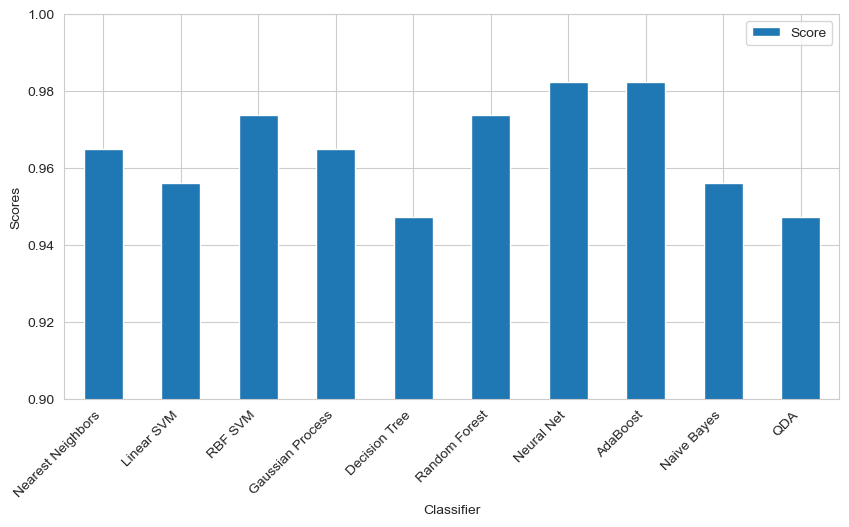

In [46]:
classifierScore_df.plot(x="Classifier", y="Score",kind='bar', figsize=(10,5))
plt.xlabel("Classifier")
plt.ylim(0.9, 1)
plt.ylabel("Scores")
plt.xticks(rotation=45, ha="right")
plt.show()

<AxesSubplot: xlabel='Classifier'>

Text(0.5, 0, 'Classifier')

(0.9, 1.0)

Text(0, 0.5, 'Scores')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nearest Neighbors'),
  Text(1, 0, 'Linear SVM'),
  Text(2, 0, 'RBF SVM'),
  Text(3, 0, 'Gaussian Process'),
  Text(4, 0, 'Decision Tree'),
  Text(5, 0, 'Random Forest'),
  Text(6, 0, 'Neural Net'),
  Text(7, 0, 'AdaBoost'),
  Text(8, 0, 'Naive Bayes'),
  Text(9, 0, 'QDA')])

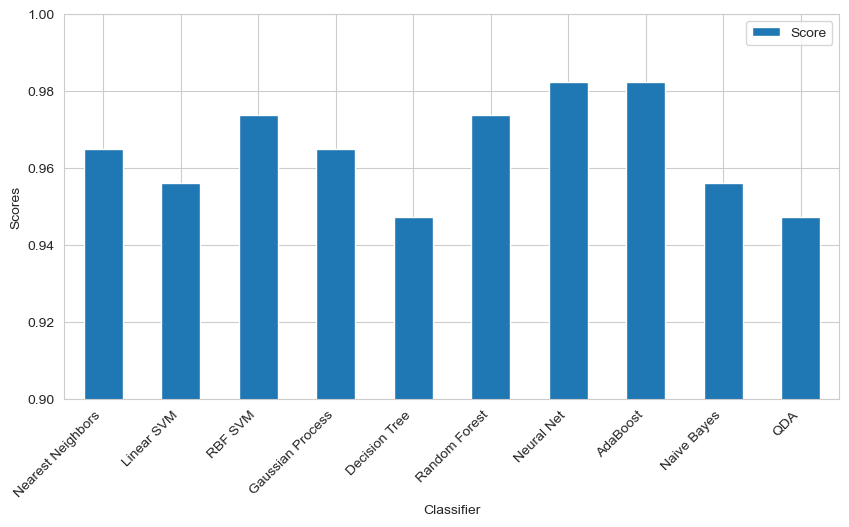

In [47]:
classifierScore_df.plot(x="Classifier", y="Score",kind='bar', figsize=(10,5))
plt.xlabel("Classifier")
plt.ylim(0.9, 1)
plt.ylabel("Scores")
plt.xticks(rotation=45, ha="right")
plt.show()

# Build Deep Neural Network

In [48]:
from keras.models import Model
from keras.layers import Input, Dense



def run_model(epochs, batch_sizes, validation_splits=0, validation_steps=0):
# define model
    visible = Input(shape=(len(final_data.columns),))
    hidden1= Dense (33, activation='relu')(visible)
    hidden2 = Dense (24, activation='relu')(hidden1)
    hidden3 = Dense (36, activation='relu') (hidden2)
    output = Dense (1, activation='sigmoid') (hidden3)
    model = Model(inputs=visible, outputs=output)
    # summarize layers model.summary()
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics='binary_accuracy') #binary_crossentropy
    # fit model
    model.fit(X_train,y_train, epochs=epochs, batch_size=batch_sizes, validation_split=validation_splits, validation_steps=validation_steps, verbose=0)
    # create predictions and assign results
    y_pred = model.predict(X_test)
    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)
    # test accuracy against test labels
    score = accuracy_score(y_test, y_pred)
    return score

epochs = [100]
batch_sizes = [20,25,30]
validation_splits = [0.05]
validation_steps = [2,3,4]
score_list = []
epoch_list = []
batch_list = []
validation_split_list = []
validation_steps_list = []

for epoch in epochs:
    for batch_size in batch_sizes:
        for validation_split in validation_splits:
            for validation_step in validation_steps:

                score = run_model(epoch, batch_size)
                epoch_list.append(epoch)
                batch_list.append(batch_size)
                validation_split_list.append(validation_split)
                validation_steps_list.append(validation_step)
                score_list.append(score)

score_list = pd.DataFrame(score_list)
batch_list = pd.DataFrame(batch_list)
epoch_list = pd.DataFrame(epoch_list)
validation_split_list = pd.DataFrame(validation_split_list)
validation_steps_list = pd.DataFrame(validation_steps_list)

results = pd.concat([score_list, epoch_list, batch_list, validation_split_list, validation_steps_list], axis=1)

2022-11-19 22:08:41.096289: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 0s 1ms/step


In [49]:
results.columns = ['score', 'epochs', 'batch size', 'validation split', 'validation steps']

In [50]:
results.iloc[:,0].max()

0.9824561403508771

In [51]:
results

,score,epochs,batch size,validation split,validation steps
0,0.956140,100,20,0.05,2
1,0.982456,100,20,0.05,3
2,0.982456,100,20,0.05,4
3,0.982456,100,25,0.05,2
4,0.982456,100,25,0.05,3
5,0.973684,100,25,0.05,4
6,0.947368,100,30,0.05,2
7,0.973684,100,30,0.05,3
8,0.982456,100,30,0.05,4


# Other Experimentation with Voting Classifier

In [52]:
clf1 = SVC(gamma=2, C=1)
clf2 = MLPClassifier(alpha=1, max_iter=1000)
clf3 = AdaBoostClassifier()

In [53]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

In [54]:
eclf.fit(X_train,y_train)
# create predictions and assign results
y_pred = eclf.predict(X_test)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)
# test accuracy against test labels
score = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('lr', SVC(C=1, gamma=2)),
                             ('rf', MLPClassifier(alpha=1, max_iter=1000)),
                             ('gnb', AdaBoostClassifier())])

# Old Model

4/4 [==============================] - 0s 1ms/step
No Skill: ROC AUC=0.500
Model: ROC AUC=0.977


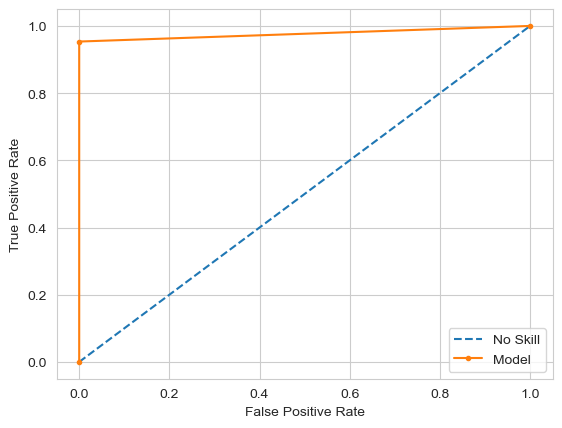

4/4 [==============================] - 0s 1ms/step
No Skill: ROC AUC=0.500
Model: ROC AUC=0.977


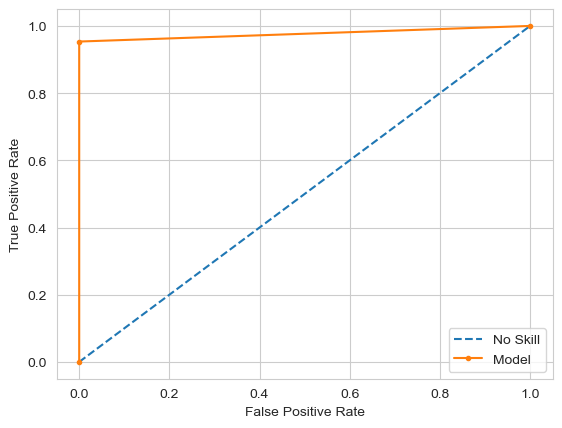

4/4 [==============================] - 0s 3ms/step
No Skill: ROC AUC=0.500
Model: ROC AUC=0.967


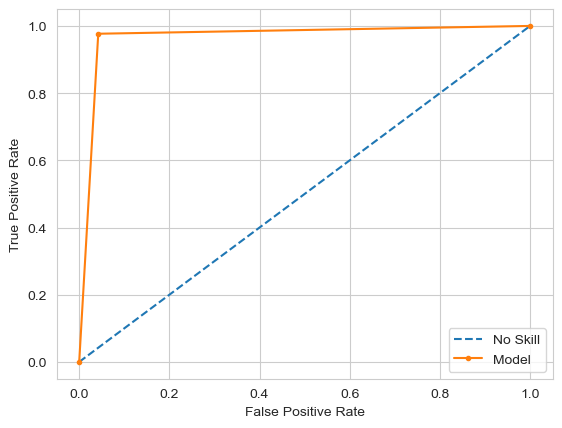

In [62]:
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import roc_curve, roc_auc_score



def run_model2(epochs):
    # define model
    visible = Input(shape=(len(final_data.columns),))
    hidden1= Dense (33, activation='relu')(visible)
    hidden2 = Dense (24, activation='relu')(hidden1)
    hidden3 = Dense (36, activation='relu') (hidden2)
    output = Dense (1, activation='sigmoid') (hidden3)
    model = Model(inputs=visible, outputs=output)
    # summarize layers model.summary()
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics= 'accuracy')
    # fit model
    model.fit(X_train,y_train, epochs=epochs, batch_size=16, verbose=0)
    # create predictions and assign results
    y_pred = model.predict(X_test)
    #Plot map
    ns_probs = [0 for _ in range(len(y_test))]
    threshold = 0.5
    lr_probs = np.where(y_pred > threshold, 1,0)

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)
    # test accuracy against test labels
    score = accuracy_score(y_test, y_pred)


    return score

epochs = range(32,35)
score_list = []

for epoch in epochs:
    score = run_model2(epoch)
    score_list.append(score)

In [63]:
np.argmax(score_list)
score_list_mean = sum(score_list) / len(score_list)
print(score_list_mean)

0

0.9766081871345028


4/4 [==============================] - 0s 1ms/step
No Skill: ROC AUC=0.500
Model: ROC AUC=0.967


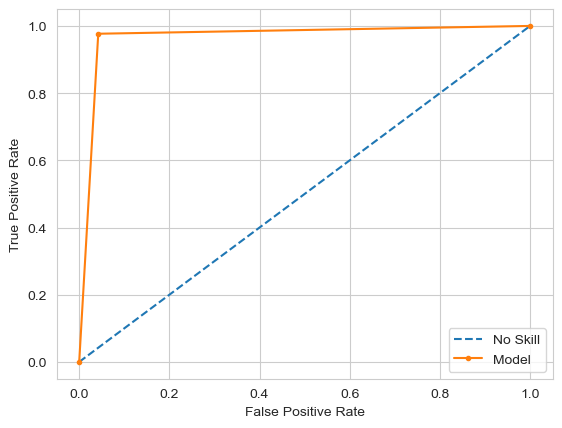

In [64]:
score = run_model2(100)

In [65]:
score

0.9649122807017544

In [66]:
diagnosis_df = labels.value_counts()

In [67]:
diagnosis_df = diagnosis_df.rename_axis('type').reset_index()

In [68]:
diagnosis_df

,type,diagnosis
0,0,357
1,1,212


In [69]:
sns.barplot(data=diagnosis_df, x=diagnosis_df.type, y=diagnosis_df.diagnosis, palette=palette)
plt.title("Diagnosis Counts")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.yticks({0:'Benign', 1:'Malignant'})
plt.show()

<AxesSubplot: xlabel='type', ylabel='diagnosis'>

Text(0.5, 1.0, 'Diagnosis Counts')

Text(0.5, 0, 'Diagnosis')

Text(0, 0.5, 'Count')

TypeError: len() of unsized object

Error in callback <function _draw_all_if_interactive at 0x166f15ab0> (for post_execute):


TypeError: len() of unsized object

TypeError: len() of unsized object

<Figure size 640x480 with 1 Axes>